# Göğüs Kanseri Sınıflandırma

In [80]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

In [83]:
data = pd.read_csv("data.csv")

In [84]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [85]:
data = data.drop(['id','Unnamed: 32'],axis=1)

In [86]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
data.rename(columns={'diagnosis': 'target'}, inplace=True)

B    357
M    212
Name: target, dtype: int64


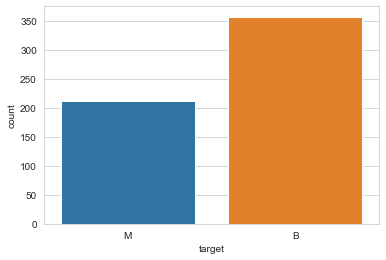

In [88]:
sns.countplot(data.target)
print(data.target.value_counts())

In [89]:
#target is string convert to int
data['target'] = [1 if i.strip() == 'M' else 0 for i in data.target]
data.target.value_counts()

0    357
1    212
Name: target, dtype: int64

In [90]:
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [92]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [93]:
#there is no missing value
#it must be standardization

### Exploratary Data Analysis (EDA)

In [94]:
# Correlation Between Features

In [95]:
corr_matrix = data.corr()

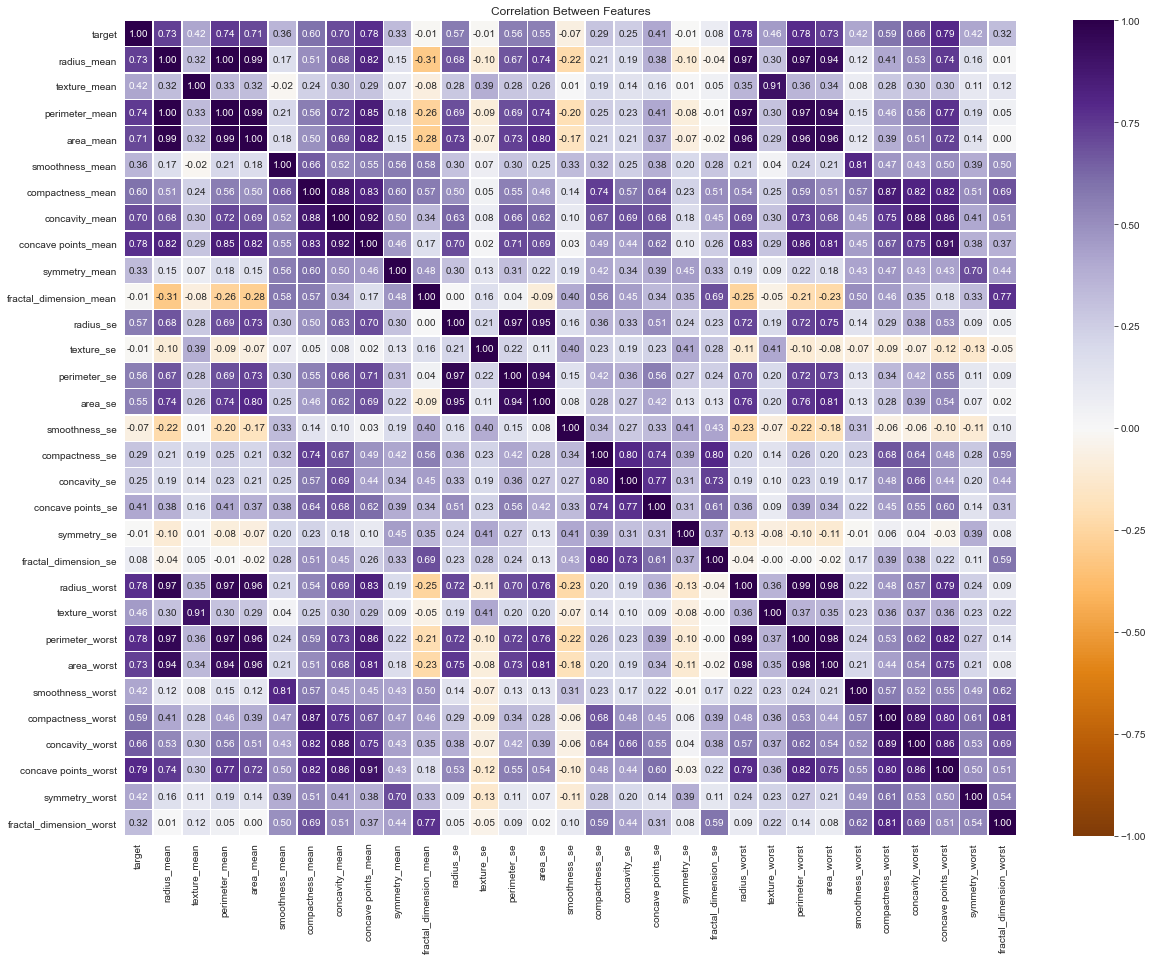

In [96]:
f,ax = plt.subplots(figsize = (20,15))
sns.despine(f, left = True , bottom = True)
sns.heatmap(corr_matrix, annot = True, cmap = "PuOr", linewidths=.5, fmt=".2f", vmin = -1 , vmax = 1) 
plt.title("Correlation Between Features")
plt.show()

In [97]:
# Çok kalabalık bir korelasyon tablosu edindik.
# Yalnızca target ile korealsyon değeri 0.75 den büyük olanlara erişmek isteyelim.

In [98]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre]

In [99]:
filtre

target                      True
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst                True
texture_worst              False
perimeter_worst             True
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst        True
symmetry_worst             False
fractal_di

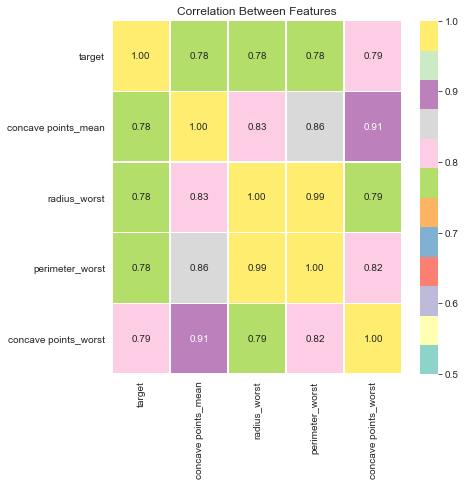

In [100]:
f,ax = plt.subplots(figsize = (6.5,6.5))
sns.despine(f, left = True , bottom = True)
sns.heatmap(data[corr_features].corr(), annot = True, cmap = "Set3", linewidths=.5, fmt=".2f", vmin = 0.5 , vmax = 1) 
plt.title("Correlation Between Features")
plt.show()

In [101]:
melted_data = pd.melt(data, id_vars = "target", var_name = "features", value_name = "value")

In [102]:
melted_data.head()

,target,features,value
0,1,radius_mean,17.99
1,1,radius_mean,20.57
2,1,radius_mean,19.69
3,1,radius_mean,11.42
4,1,radius_mean,20.29


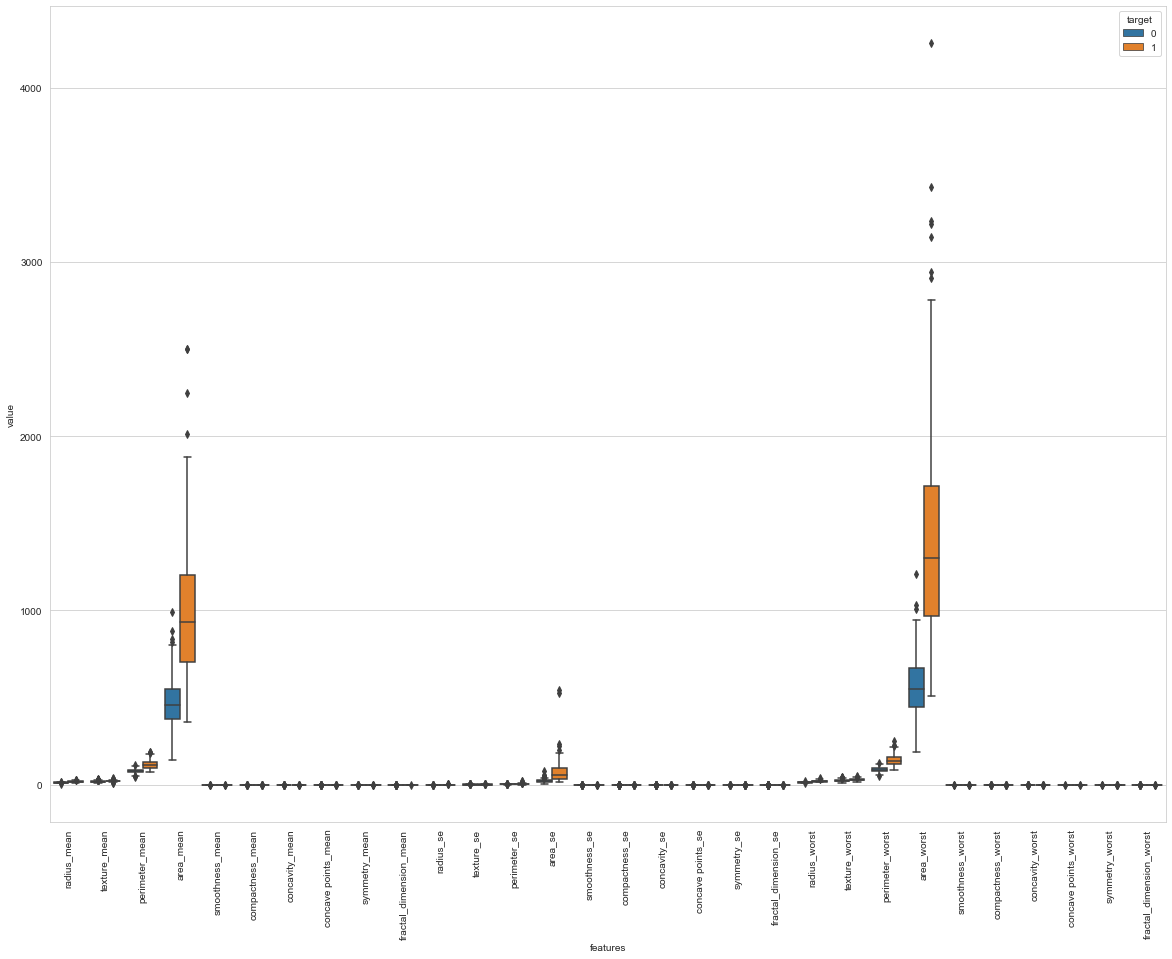

In [103]:
plt.figure(figsize=(20,15))
sns.boxplot(x="features", y = "value", hue = "target", data=melted_data)
plt.xticks(rotation = 90)
plt.show()

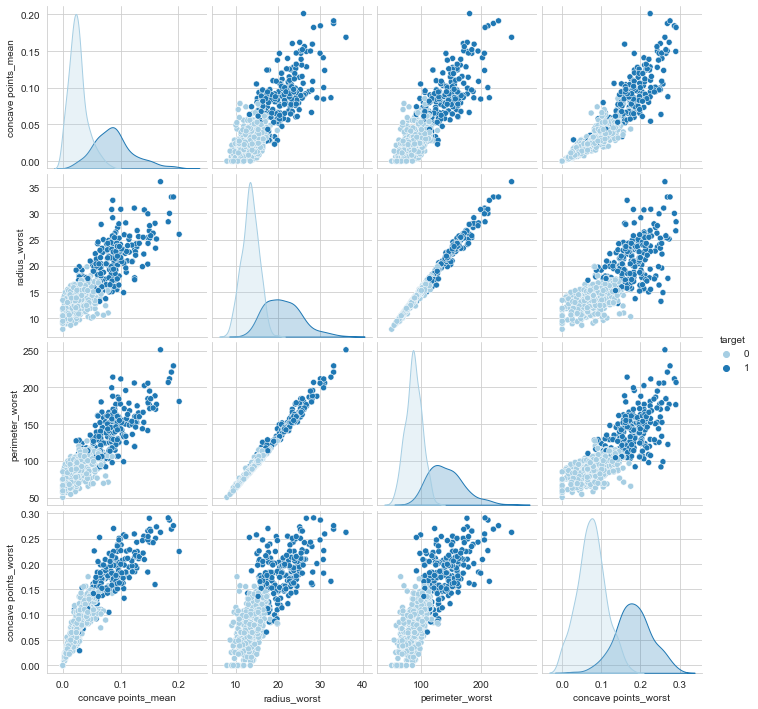

In [104]:
#pairplot
sns.pairplot(data[corr_features],hue="target", palette="Paired", diag_kind="kde")
plt.show()

In [105]:
#skewness(çarpıklık) olabilir. Yani çoğunluk değer ortalama değerde yığılmamışsa pozitif veya negatif skewness var demektir.

### Local Outlier Factor

In [106]:
y = data[["target"]]
x = data.drop("target", axis = 1)

In [107]:
columns = data.columns.tolist()

In [108]:
clf = LocalOutlierFactor()

In [109]:
#outlier tahmin değerleri
#-1 döndürürse outlier, 1 döndürürse inlier diyeceğiz.
y_pred = clf.fit_predict(x)
x_scores = clf.negative_outlier_factor_

In [110]:
outlier_scores = pd.DataFrame({"Score" : x_scores}).sort_values(by="Score",ascending=True)

In [111]:
outlier_scores.head(10)

,Score
461,-3.134467
212,-2.251552
38,-2.233433
265,-2.191808
101,-2.141954
31,-1.997601
180,-1.966864
417,-1.887223
122,-1.865116
368,-1.852979


In [112]:
#outlier değerleri için threshold belirleyeceğiz
threshold = -2.5
filtre = outlier_scores["Score"] < threshold  #skorlarımız -2 değerinden küçükse outlier olarak kabul edeceğiz.
outlier_index = outlier_scores[filtre].index.tolist() #-2 den küçük olan skorlarımızı bir listede tuttuk.

In [113]:
outlier_index

[461]

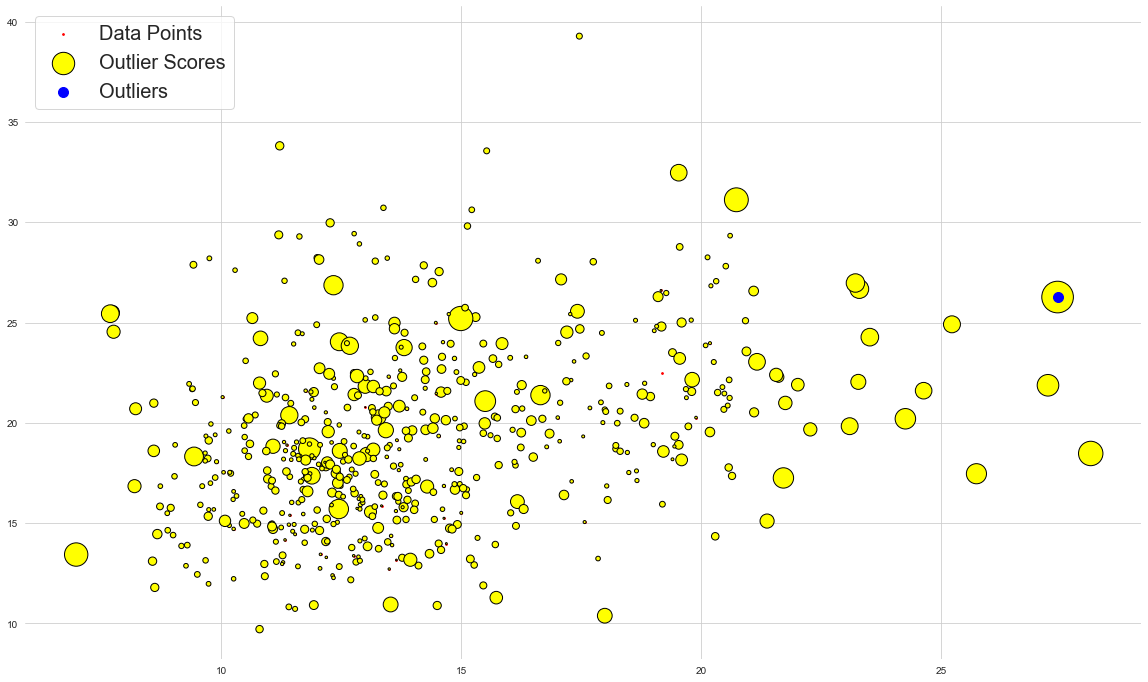

In [114]:
sns.set_style("whitegrid")
f,ax = plt.subplots(figsize = (20,12))
sns.despine(f, left=True, bottom=True ) 

#normalization


#plotting

plt.scatter(x.iloc[:,0], x.iloc[:,1], color="r", s=3, label = "Data Points") #ilk iki sütunu seçtik.

radius = (x_scores.max() - x_scores) / (x_scores.max() - x_scores.min()) 
#outlierslerin etrafını kaplaması için bir radius(çap) değeri yaptık. standardize işlemi ile
outlier_scores['Radius'] = radius #outliers dataframimize de ekledik.

plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors="k", facecolors = "yellow", label = "Outlier Scores")
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], s = 100, color = "b", label = "Outliers")

plt.legend(loc=2, prop = {"size" : 20})
plt.show()

#radiues değerine göre ayarladığımız için, en büyük siyah noktalar outlier olarak ortaya çıkmaktadır.

# Neden sadece ilk iki sütunun outlierlerini inceledik? Boxplotta hala bir sürü outlier mevcut?

In [115]:
#outlierlari silmek
x = x.drop(outlier_index)   #461. indexi sildik
y = y.drop(outlier_index).values  #461. indexin target değerini de sildik

In [116]:
#train-test splitting
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [117]:
#standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test) #x_train üzerinden eğiteceğimiz için, sadece x_train i fit_transform etmeliyiz

In [118]:
columns = data.columns.drop("target")
x_train_df = pd.DataFrame(x_train, columns = columns)

In [119]:
x_train_desc = x_train_df.describe()
x_train_desc

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,...,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02
mean,1.789780e-17,-2.863648e-16,-7.243017e-17,-2.245615e-16,-2.852462e-17,-2.645519e-16,2.544844e-17,8.585352e-17,-1.639187e-15,6.331347e-16,...,1.166154e-16,-4.810034e-16,-4.438096e-16,-9.620069e-17,6.988532e-16,-1.185729e-16,7.187086e-17,-7.243017e-17,-6.739641e-17,6.236265e-17
std,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,...,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00
min,-1.712388e+00,-2.175361e+00,-1.632924e+00,-1.303791e+00,-2.404872e+00,-1.638974e+00,-1.126020e+00,-1.291511e+00,-2.340956e+00,-1.731378e+00,...,-1.554165e+00,-2.165353e+00,-1.558852e+00,-1.163524e+00,-2.217924e+00,-1.426295e+00,-1.351626e+00,-1.782104e+00,-2.098683e+00,-1.623010e+00
25%,-7.039450e-01,-7.291157e-01,-7.065592e-01,-6.765379e-01,-7.086599e-01,-7.677983e-01,-7.505222e-01,-7.462174e-01,-6.923019e-01,-7.154003e-01,...,-6.821946e-01,-7.528643e-01,-7.019438e-01,-6.578384e-01,-7.527979e-01,-6.715073e-01,-7.547935e-01,-7.847938e-01,-6.687460e-01,-6.938485e-01
50%,-2.446426e-01,-1.109439e-01,-2.549616e-01,-2.989145e-01,-9.870612e-02,-2.500035e-01,-3.559314e-01,-3.888829e-01,-3.575803e-02,-1.774476e-01,...,-2.715302e-01,-5.708877e-02,-2.809144e-01,-3.430225e-01,-4.097822e-02,-2.830139e-01,-2.487165e-01,-2.253839e-01,-1.273445e-01,-2.398587e-01
75%,4.919745e-01,5.648931e-01,5.336490e-01,3.852569e-01,6.086412e-01,5.418139e-01,4.663710e-01,6.740944e-01,5.587789e-01,4.845408e-01,...,4.880926e-01,6.757303e-01,5.339215e-01,2.884427e-01,6.097035e-01,5.982844e-01,5.947450e-01,7.322025e-01,4.793437e-01,4.494271e-01
max,4.033514e+00,4.645288e+00,4.063861e+00,5.327298e+00,4.767417e+00,4.097233e+00,4.417475e+00,4.049923e+00,4.490747e+00,4.845302e+00,...,3.590418e+00,3.877586e+00,3.782128e+00,4.325859e+00,3.771406e+00,4.615614e+00,3.461489e+00,2.511223e+00,5.979346e+00,5.130159e+00


In [120]:
#box plot standardization data
x_train_df['target'] = y_train
melted_data = pd.melt(x_train_df, id_vars = "target", var_name = "features", value_name = "value")

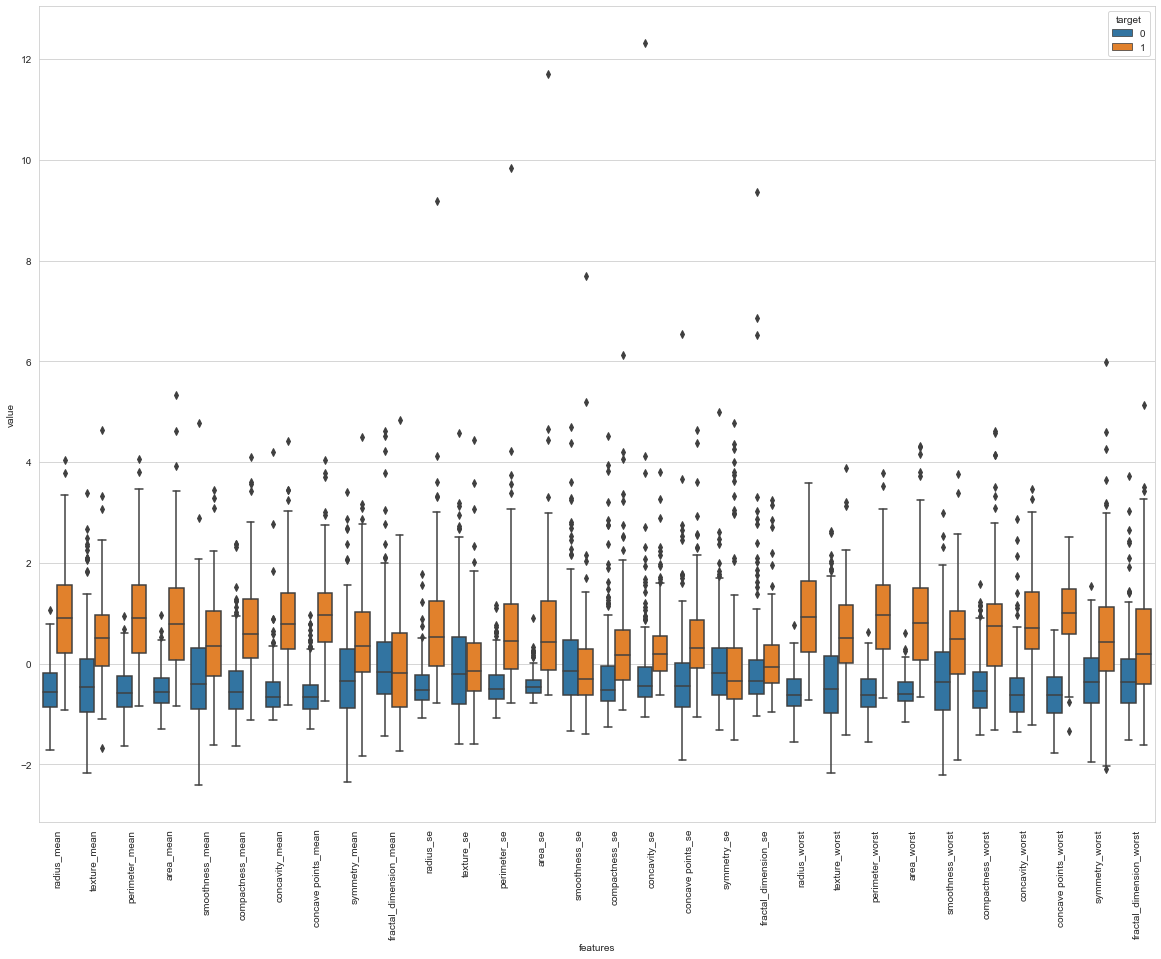

In [121]:
plt.figure(figsize=(20,15))
sns.boxplot(x="features", y = "value", hue = "target", data=melted_data)
plt.xticks(rotation = 90)
plt.show()

### KNN

In [122]:
knn = KNeighborsClassifier(n_neighbors=2)

In [123]:
model = knn.fit(x_train,y_train)

In [124]:
y_pred = model.predict(x_test)

In [125]:
cm = confusion_matrix(y_test,y_pred)

In [126]:
acc = accuracy_score(y_test,y_pred)

In [127]:
print("Confusion Matrix :\n",cm)
print("Score :",acc)
#üst taraf iyi huylu 107+0 (107 doğru 0 yanlış tahmin)
#alt taraf köyüt huylu 8+55 (55 doğru 8 yanlış tahmin)

Confusion Matrix :
 [[108   1]
 [  7  55]]
Score : 0.9532163742690059


### Model Tuning

In [128]:
def KNN_Best_Params(x_train,x_test,y_train,y_test):
    n_neighbors_values = list(range(1,31))
    weight_values = ['uniform','distance']
    knn_params = {"n_neighbors" : n_neighbors_values
                 ,"weights"     : weight_values }
    
    knn = KNeighborsClassifier()
    knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(x_train,y_train)
    
    print("The Best Params: {}\nThe Best Score: {}".format(knn_cv_model.best_params_,
                                                           knn_cv_model.best_score_))
    print("\n")
    
    knn_tuned  = KNeighborsClassifier(n_neighbors= knn_cv_model.best_params_['n_neighbors']
                                     ,weights    = knn_cv_model.best_params_['weights']).fit(x_train,y_train)
    
    y_pred_test = knn_tuned.predict(x_test)
    y_pred_train = knn_tuned.predict(x_train)
    
    acc_score_test = accuracy_score(y_test, y_pred_test)
    acc_score_train = accuracy_score(y_train, y_pred_train)
    
    cmatrix_test  =  confusion_matrix(y_test  ,y_pred_test)
    cmatrix_train =  confusion_matrix(y_train ,y_pred_train)
    
    print("Test Başarı Skoru: {}\nTrain Başarı Skoru: {}".format(acc_score_test, acc_score_train))
    print("\n")
    print("Test Confusion Matrix:\n ",cmatrix_test)
    print("\n")
    print("Train Confusion Matrix:\n ",cmatrix_train)
    print("\n\n")
    return knn_cv_model
    

In [129]:
KNN_Best_Params(x_train,x_test,y_train,y_test)

The Best Params: {'n_neighbors': 4, 'weights': 'uniform'}
The Best Score: 0.9670512820512821


Test Başarı Skoru: 0.9590643274853801
Train Başarı Skoru: 0.9773299748110831


Test Confusion Matrix:
  [[107   2]
 [  5  57]]


Train Confusion Matrix:
  [[248   0]
 [  9 140]]





GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

**Train skorumuz test skorumuzdan yüksek çıktı. Yani bir ezberleme(overfitting) söz konusudur.**
* %10 ve üzeri farklar kesinlikle overfitting dir. %6 da overfit olmaya meyilli bir fark olduğundan kontrol etmeliyiz.
* Amacımız train ve test skorlarının farkını azaltmaktır.
* Ya test skorumuzu arttıracağız ya da train skorumuzu azaltacağız ki aradaki fark azalsın.

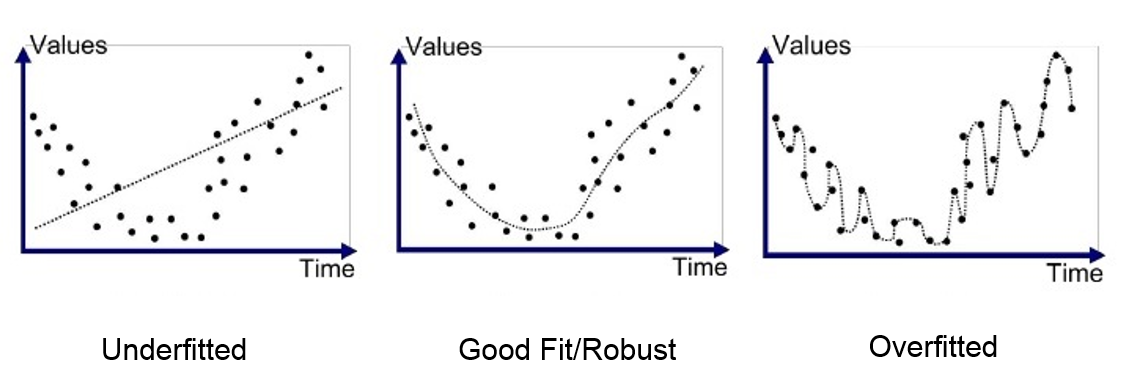

In [130]:
knn_tuned = KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)

In [131]:
y_test_predict = knn_tuned.predict(x_test)
y_train_predict = knn_tuned.predict(x_train)

In [132]:
test_score = accuracy_score(y_test, y_test_predict)
train_score = accuracy_score(y_train, y_train_predict)

In [133]:
print("Test Skorumuz: {}\nTrain Skorumuz: {}".format(test_score, train_score))

Test Skorumuz: 0.9532163742690059
Train Skorumuz: 0.9697732997481109


**Train ve Test skoru farkını 2 ye kadar düşürdük ve overfitting den kurtulmuş olduk.**

#### Veriyi 0 Merkeze Çekmek

In [134]:
a = np.random.randint(0,200,150)
b = np.random.randint(0,200,150)

<AxesSubplot:>

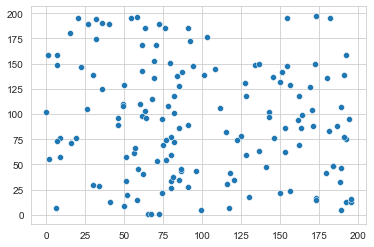

In [135]:
sns.scatterplot(a,b)

In [136]:
amean = a.mean()
bmean = b.mean()

In [137]:
a = a - amean
b = b - bmean

<AxesSubplot:>

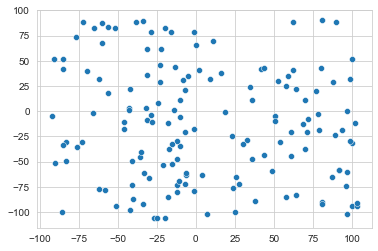

In [138]:
sns.scatterplot(a,b)

### PCA (Principal Component Analysis)

**PCA kullanmak için verimizi scale etmemiz gerekiyor.**

In [139]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [140]:
pca = PCA(n_components=2) #30 bileşenli verisetimizi 2 bileşene düşürdük.
x_reduced_pca = pca.fit_transform(x_scaled)

In [141]:
pca_data = pd.DataFrame(x_reduced_pca, columns = ['p1', 'p2'])

In [142]:
pca_data['target'] = y 

In [143]:
pca_data.head()

,p1,p2,target
0,9.433854,1.789756,1
1,2.482282,-3.868116,1
2,5.865425,-1.184200,1
3,7.205733,10.197309,1
4,4.062830,-2.024530,1


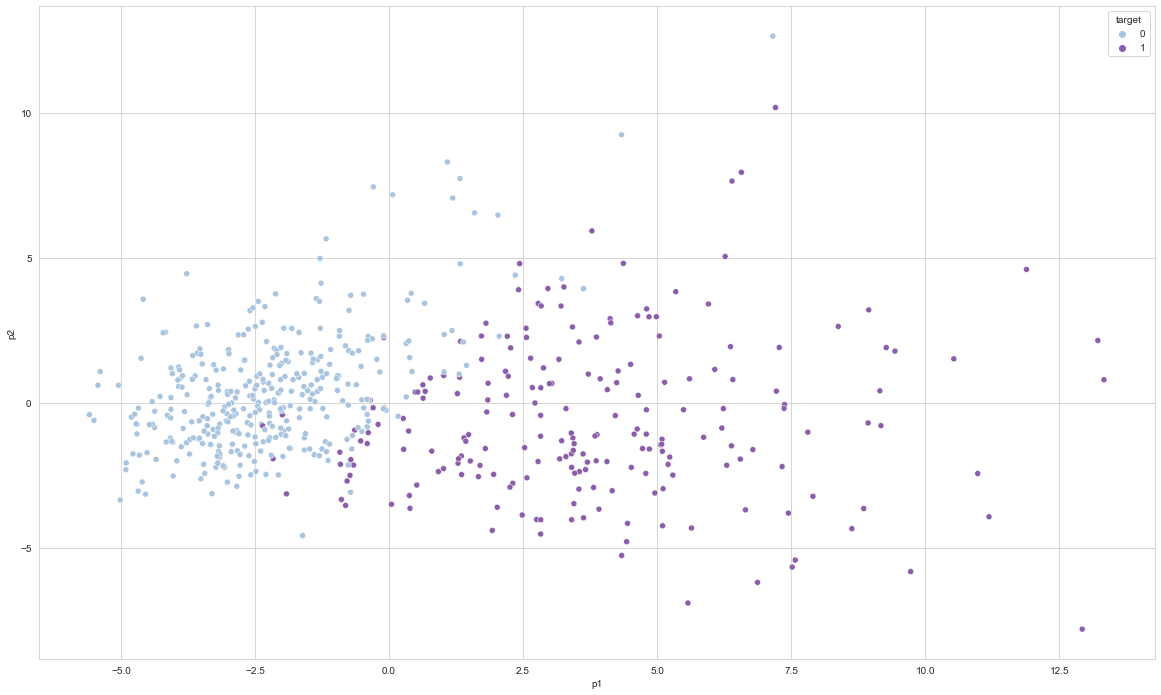

In [159]:
plt.figure(figsize = (20,12))
sns.scatterplot(x="p1", y="p2", hue = "target", data=pca_data, palette = "BuPu");

In [160]:
#train-test splitting
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced_pca,y, test_size = 0.3, random_state = 42)

In [161]:
grid_pca = KNN_Best_Params(x_train_pca, x_test_pca, y_train_pca, y_test_pca)

The Best Params: {'n_neighbors': 9, 'weights': 'uniform'}
The Best Score: 0.9419230769230769


Test Başarı Skoru: 0.9239766081871345
Train Başarı Skoru: 0.947103274559194


Test Confusion Matrix:
  [[103   6]
 [  7  55]]


Train Confusion Matrix:
  [[241   7]
 [ 14 135]]





**Yanlış olan değerlerimizin hangileri olduğunu bir görselleştirme ile inceleyelim**

In [162]:
cmap_light = ListedColormap(['orange','cornflowerblue']) #listedcolormap renkleri listelemeye yarar.
cmap_dark  = ListedColormap(['darkorange','darkblue']) 

In [163]:
h = .05 #grafikdeki adım boyutu 

In [167]:
x = x_reduced_pca
x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1 
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [171]:
Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

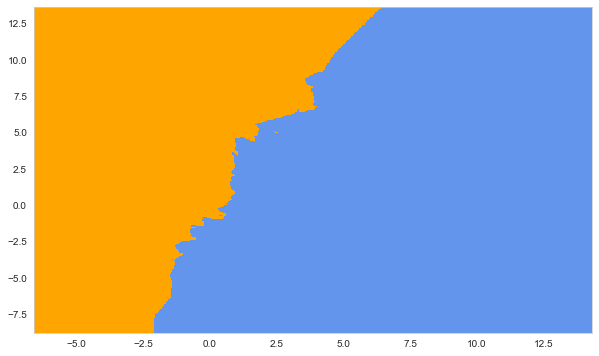

In [173]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

Text(0.5, 1.0, "2 - Class classification (k = 9, weights = 'uniform')")

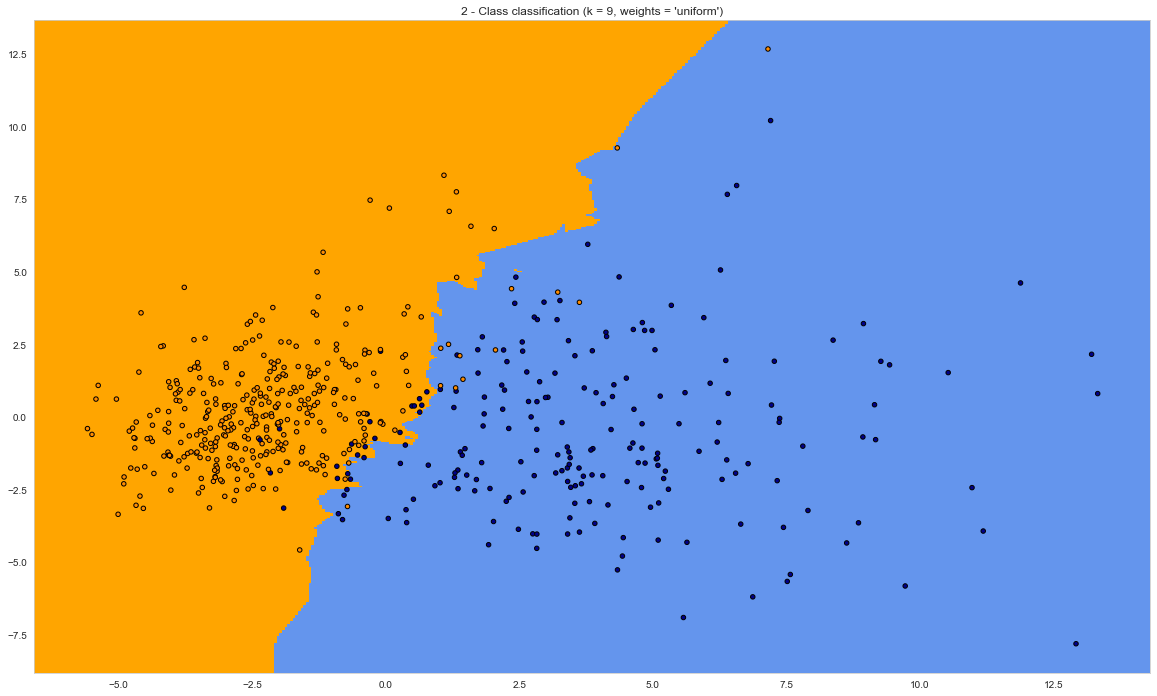

In [177]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,12))
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)


plt.scatter(x[:,0],x[:,1], c=y, cmap = cmap_dark, edgecolors="k", s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i - Class classification (k = %i, weights = '%s')"
         % (len(np.unique(y)), grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

### Neighborhood Component Analysis

In [178]:
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=42)

In [179]:
nca.fit(x_scaled,y)

NeighborhoodComponentsAnalysis(n_components=2, random_state=42)

In [180]:
x_reduced_nca = nca.transform(x_scaled)

In [181]:
nca_data = pd.DataFrame(x_reduced_nca, columns = ['p1','p2'])

In [182]:
nca_data['target'] = y

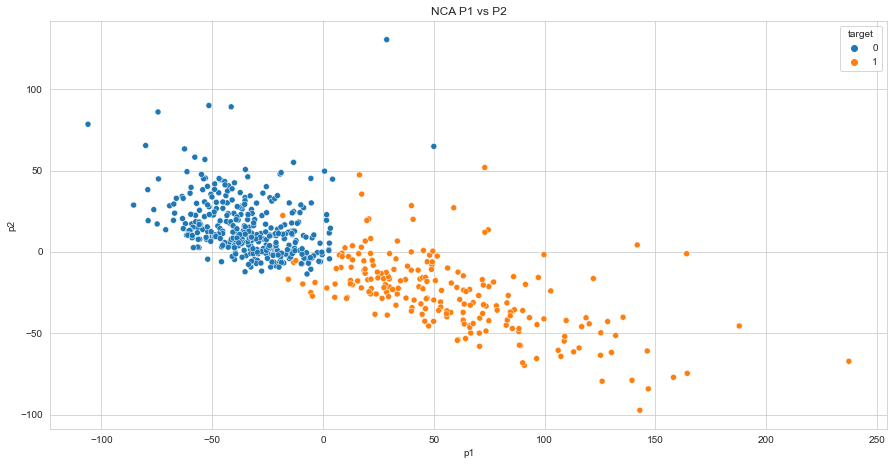

In [189]:
plt.figure(figsize = (15,7.5))
sns.scatterplot(x = "p1", y="p2", hue = "target", data=nca_data)
plt.title("NCA P1 vs P2")
plt.show()

In [190]:
#train-test splitting
x_train_nca, x_test_nca, y_train_nca, y_test_nca = train_test_split(x_reduced_nca,y, test_size = 0.3, random_state = 42)

In [191]:
grid_nca = KNN_Best_Params(x_train_nca, x_test_nca, y_train_nca, y_test_nca)

The Best Params: {'n_neighbors': 1, 'weights': 'uniform'}
The Best Score: 0.9873076923076922


Test Başarı Skoru: 0.9941520467836257
Train Başarı Skoru: 1.0


Test Confusion Matrix:
  [[108   1]
 [  0  62]]


Train Confusion Matrix:
  [[248   0]
 [  0 149]]





### MESH GRAFİK İLE YANLIŞ DEĞERİ DİREKT TESPİT ETMEK

In [193]:
h = .2

In [194]:
x = x_reduced_nca
x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1 
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [195]:
Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0.5, 1.0, "2 - Class classification (k = 1, weights = 'uniform')")

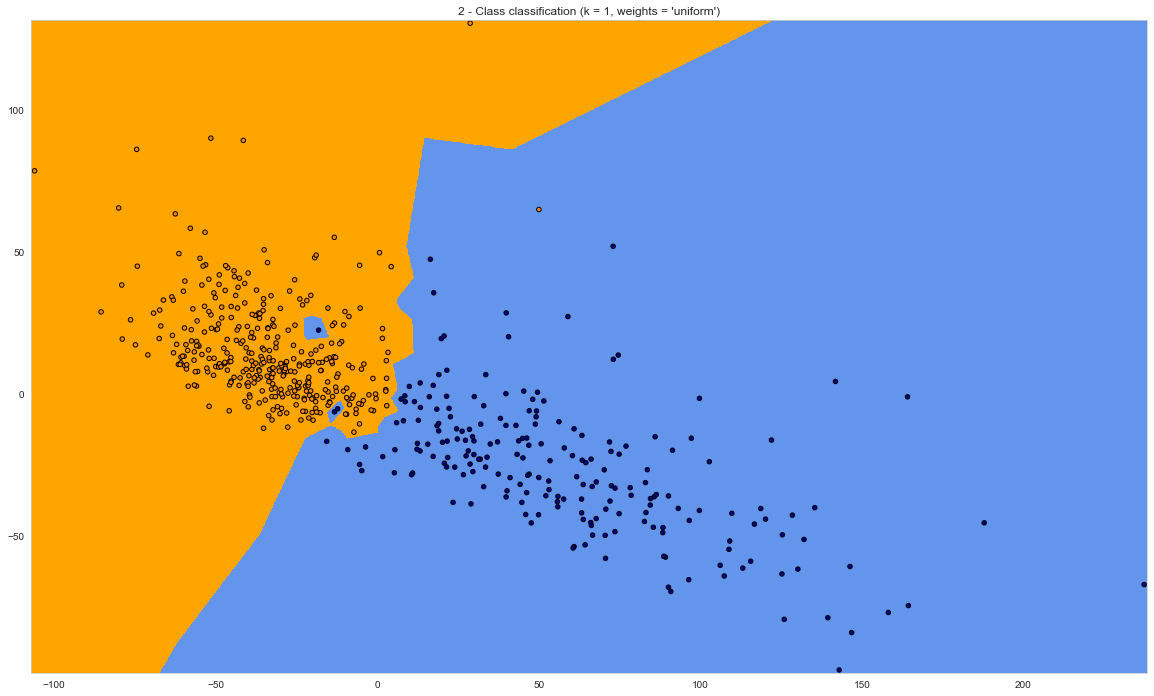

In [196]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,12))
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)


plt.scatter(x[:,0],x[:,1], c=y, cmap = cmap_dark, edgecolors="k", s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i - Class classification (k = %i, weights = '%s')"
         % (len(np.unique(y)), grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))